In [31]:
import pandas
from ots_eval.stability_evaluation.close import CLOSE
import numpy as np
import csv
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
import seaborn as sns

%matplotlib inline

In [2]:
data1 = pandas.read_csv("generated_1d_data.csv")
data1.head()

object_id  time  feature1
0          1     1  0.800000
1          2     1  0.808568
2          3     1  0.791467
3          4     1  0.809371
4          5     1  0.764732

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   object_id  232 non-null    int64  
 1   time       232 non-null    int64  
 2   feature1   232 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


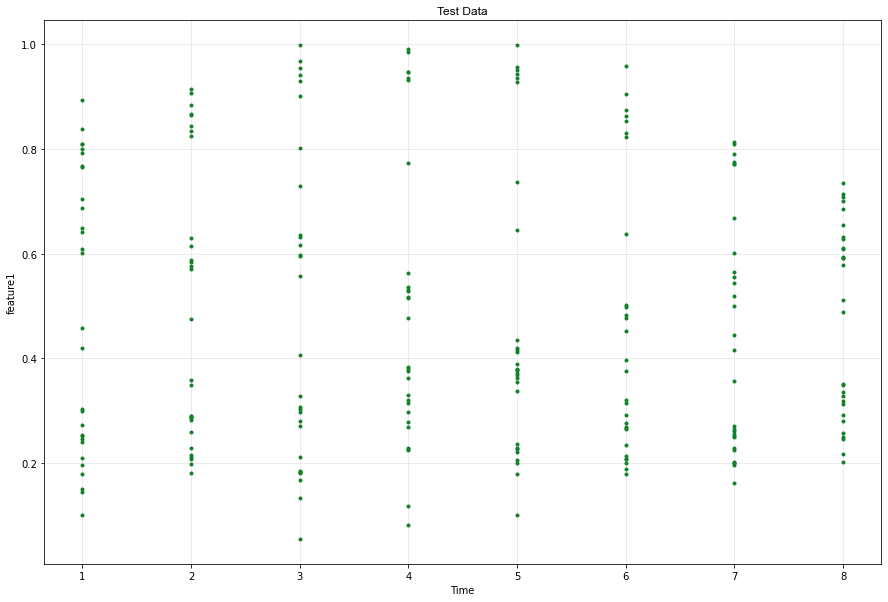

In [4]:
plt.figure(figsize=(15,10))
_ = plt.plot(data1['time'], data1['feature1'],
            marker='.', linewidth=0, color='#128128')
_ = plt.grid(which='major', color='#cccccc', alpha=0.45)
_ = plt.title('Test Data', family='Arial', fontsize=12)
_ = plt.xlabel('Time')
_ = plt.ylabel('feature1')
_ = plt.show()

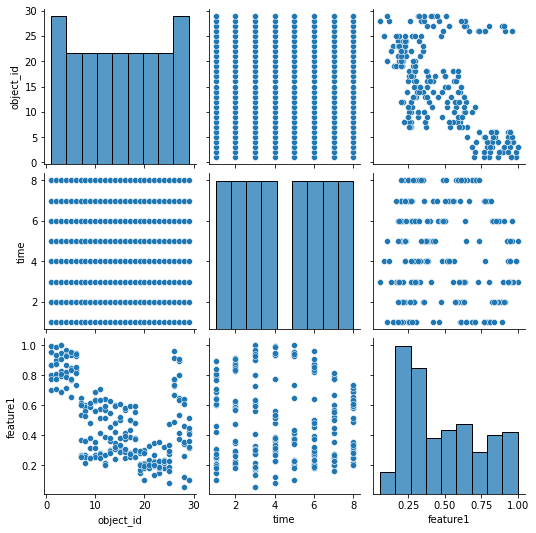

In [5]:
sns.pairplot(data1)

In [6]:
dbscan_data = data1[['time', 'feature1']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

array([[1.        , 0.8       ],
       [1.        , 0.8085683 ],
       [1.        , 0.7914667 ],
       [1.        , 0.80937093],
       [1.        , 0.76473176],
       [1.        , 0.83759856],
       [2.        , 0.8647178 ],
       [2.        , 0.8831345 ],
       [2.        , 0.82394534],
       [2.        , 0.8671981 ],
       [2.        , 0.8440505 ],
       [2.        , 0.8347174 ],
       [3.        , 0.95528114],
       [3.        , 0.9006279 ],
       [3.        , 0.99850047],
       [3.        , 0.967664  ],
       [3.        , 0.9410739 ],
       [3.        , 0.9293153 ],
       [4.        , 0.99027413],
       [4.        , 0.9850939 ],
       [4.        , 0.9462315 ],
       [4.        , 0.9355854 ],
       [4.        , 0.93076074],
       [4.        , 0.9463508 ],
       [5.        , 0.95084625],
       [5.        , 0.9347837 ],
       [5.        , 0.9986298 ],
       [5.        , 0.9285699 ],
       [5.        , 0.9567241 ],
       [5.        , 0.94316995],
       [6.

In [7]:
dbscan_data_scaler = StandardScaler()
dbscan_data = dbscan_data_scaler.fit_transform(dbscan_data)
dbscan_data

array([[-1.5275252 ,  1.2470676 ],
       [-1.5275252 ,  1.2803782 ],
       [-1.5275252 ,  1.2138928 ],
       [-1.5275252 ,  1.2834986 ],
       [-1.5275252 ,  1.1099561 ],
       [-1.5275252 ,  1.3932384 ],
       [-1.0910895 ,  1.498669  ],
       [-1.0910895 ,  1.5702671 ],
       [-1.0910895 ,  1.3401592 ],
       [-1.0910895 ,  1.5083117 ],
       [-1.0910895 ,  1.4183215 ],
       [-1.0910895 ,  1.3820373 ],
       [-0.65465367,  1.8507496 ],
       [-0.65465367,  1.6382757 ],
       [-0.65465367,  2.0187721 ],
       [-0.65465367,  1.8988901 ],
       [-0.65465367,  1.7955165 ],
       [-0.65465367,  1.7498031 ],
       [-0.2182179 ,  1.9867908 ],
       [-0.2182179 ,  1.9666517 ],
       [-0.2182179 ,  1.8155675 ],
       [-0.2182179 ,  1.774179  ],
       [-0.2182179 ,  1.7554224 ],
       [-0.2182179 ,  1.8160315 ],
       [ 0.2182179 ,  1.8335083 ],
       [ 0.2182179 ,  1.7710623 ],
       [ 0.2182179 ,  2.019275  ],
       [ 0.2182179 ,  1.7469051 ],
       [ 0.2182179 ,

In [8]:
model = DBSCAN(eps=0.25, min_samples=3).fit(dbscan_data)
model

DBSCAN(eps=0.25, min_samples=3)

In [9]:
outliers_df = data1[model.labels_ == -1]
clusters_df = data1[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

clusters = Counter(model.labels_)
print(clusters)
print(data1[model.labels_ == -1].head())
print('Number of clusters = {}' .format(len(clusters)-1))

Counter({12: 21, -1: 17, 0: 14, 7: 14, 16: 14, 11: 13, 13: 13, 14: 13, 15: 13, 17: 13, 18: 13, 19: 9, 1: 8, 5: 7, 10: 7, 20: 7, 2: 6, 3: 6, 4: 6, 6: 6, 8: 6, 9: 6})
     object_id  time  feature1
193         25     2  0.475735
195         25     4  0.082125
202         26     3  0.729646
203         26     4  0.772782
204         26     5  0.736370
Number of clusters = 21


In [10]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  0,  0,  0,
        0,  0,  0,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15,
       16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 19, 19, 19, 19,
       19, 19,  7,  7,  7,  7,  7,  7, 15, 15, 15, 15, 15, 15, 16, 16, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 20, 20,
       20, 20, 20, 20, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 15, -1, 17, -1, 20, 12, 13, 14,  0,  1, -1, -1,
       -1,  5, -1, -1,  0,  1, -1, 10, -1, 12, 19,  7, -1, 16, -1, -1, 11,
       -1, 19,  7, -1, 16

In [11]:
clusters_df

object_id  time  feature1
0            1     1  0.800000
1            2     1  0.808568
2            3     1  0.791467
3            4     1  0.809371
4            5     1  0.764732
..         ...   ...       ...
223         28     8  0.608721
225         29     2  0.359180
227         29     4  0.314532
229         29     6  0.321176
230         29     7  0.445069

[215 rows x 3 columns]

In [12]:
outliers_df

object_id  time  feature1
193         25     2  0.475735
195         25     4  0.082125
202         26     3  0.729646
203         26     4  0.772782
204         26     5  0.736370
206         26     7  0.667754
207         26     8  0.488550
210         27     3  0.802239
212         27     5  0.646201
216         28     1  0.457724
218         28     3  0.055223
219         28     4  0.118856
221         28     6  0.637449
224         29     1  0.420732
226         29     3  0.405914
228         29     5  0.101838
231         29     8  0.510982

In [13]:
df = pandas.read_csv('generated_1d_data.csv')
df_list = df.values.tolist()
print(df_list)

[[1.0, 1.0, 0.8], [2.0, 1.0, 0.8085683113627896], [3.0, 1.0, 0.7914666865610138], [4.0, 1.0, 0.8093709561361365], [5.0, 1.0, 0.7647317878567402], [6.0, 1.0, 0.8375985501628784], [1.0, 2.0, 0.8647177745066892], [2.0, 2.0, 0.8831344785748303], [3.0, 2.0, 0.8239453212889476], [4.0, 2.0, 0.8671980976634801], [5.0, 2.0, 0.8440505119013404], [6.0, 2.0, 0.8347173757090572], [1.0, 3.0, 0.9552811563358716], [2.0, 3.0, 0.9006279222299235], [3.0, 3.0, 0.9985004808102264], [4.0, 3.0, 0.9676640296520536], [5.0, 3.0, 0.9410738746461657], [6.0, 3.0, 0.9293153424846772], [1.0, 4.0, 0.9902741257628628], [2.0, 4.0, 0.9850938638898592], [3.0, 4.0, 0.9462315031283282], [4.0, 4.0, 0.9355854017066172], [5.0, 4.0, 0.9307607430618716], [6.0, 4.0, 0.9463508290087588], [1.0, 5.0, 0.9508462381686772], [2.0, 5.0, 0.9347837103679284], [3.0, 5.0, 0.9986297875133796], [4.0, 5.0, 0.9285698947634512], [5.0, 5.0, 0.9567241002501656], [6.0, 5.0, 0.9431699530835718], [1.0, 6.0, 0.8638450733940471], [2.0, 6.0, 0.873990620

In [ ]:
t1.append(pd.DataFrame([[7,8,9]], columns=["hans","peter","james"])) #beispiel append fuer df

In [1]:
import warnings
warnings.filterwarnings('ignore')

from pandas.core.common import flatten
import random
import statistics
import pandas as pd
import numpy as np
from plotnine import * 
from ots_eval.stability_evaluation.close import CLOSE

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
def filter_missing_rows(X, columnA, columnB):
    ids = list(set(columnA))
    time = list(set(columnB))
    result = []

    for x in ids:
        for y in time:
            if X[(columnA == x) & (columnB == y)].empty: # | X[(columnC == np.NaN)]
                result.append([x, y])
    
    return result  

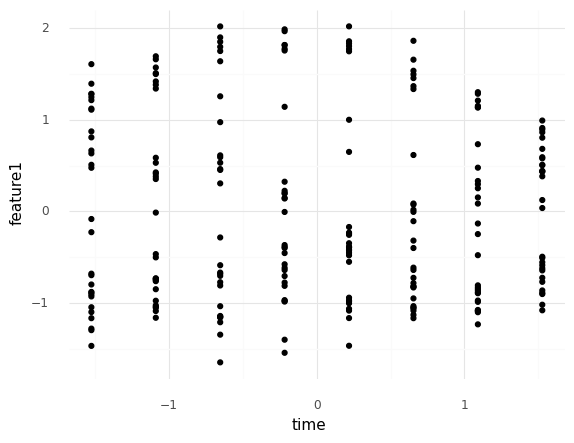

<ggplot: (112724496397)>

In [3]:
d1 = pd.read_csv("generated_1d_data.csv")

d1.head()
z = StandardScaler()
d1[["time", "feature1"]] = z.fit_transform(d1[["time", "feature1"]])

ggplot(d1, aes(x = "time", y = "feature1")) + geom_point() + theme_minimal()

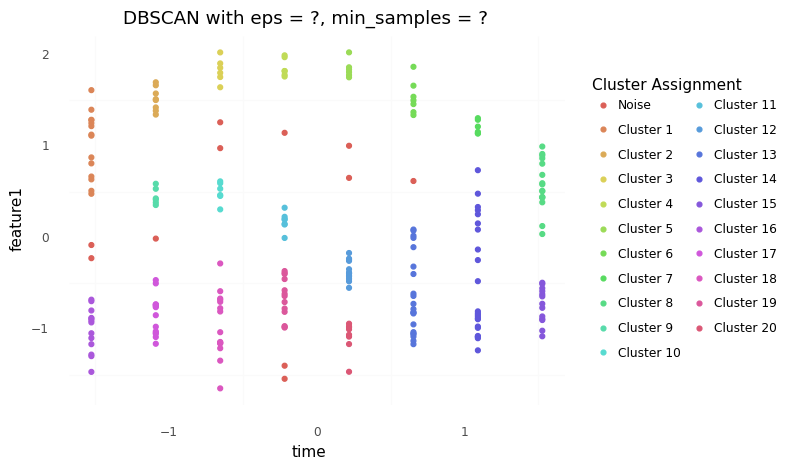

<ggplot: (112725019760)>

In [4]:
test_db1 = DBSCAN(eps = 0.35, min_samples = 3).fit(d1[["time", "feature1"]])

labsList = ["Noise"]
labsList = labsList + ["Cluster " + str(i) for i in range(1, len(set(test_db1.labels_)))]

d1["assignments"] = test_db1.labels_

(ggplot(d1, aes(x = "time", y = "feature1", color = "factor(assignments)")) + geom_point() + theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = ?, min_samples = ? "))

In [5]:
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["time", "feature1"]], d1_clustered[["assignments"]])

0.4494636684596996

In [6]:
rater = CLOSE(d1[['object_id', 'time', 'assignments', 'feature1']], 'mae', 2, jaccard=True, weighting=True, exploitation_term=True)
print(rater.rate_clustering())
rater = CLOSE(d1[['object_id', 'time', 'assignments', 'feature1']], 'exploit', 2, jaccard=True, weighting=True)
print(rater.rate_time_clustering())

0.4361032337356829
0.4837081210861121


In [7]:
#teilmenge aus DF nehmen fuer die wiederherstellung
testing = d1.sample(frac =.8)

In [8]:
#Spalten die gescaled wurden wieder zurückscalen
d1[["time", "feature1"]] = z.inverse_transform(d1[["time", "feature1"]])
testing[["time", "feature1"]] = z.inverse_transform(testing[["time", "feature1"]])

In [9]:
#rausfiltern der komplett verlorenen Zeilen *(id, time)
missing_rows = filter_missing_rows(testing, testing.object_id, testing.time)

In [10]:
missing_id_list = []

for ids, _ in missing_rows:
    missing_id_list.append(ids)
    
missing_id_list = sorted(list(set(missing_id_list)))
missing_id_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 25,
 26,
 27,
 28,
 29]

In [11]:
id_assignment_list = []
needed_assignments = []

for x in missing_id_list:
    needed_assignments = list((set(testing[testing["object_id"] == x].assignments)))
    if -1 in needed_assignments:
        needed_assignments.remove(-1)
    id_assignment_list.append([x, list(needed_assignments)])
    needed_assignments.clear()
    
id_assignment_list

[[1, [0, 1, 2, 4, 5, 6, 7]],
 [2, [0, 1, 2, 4, 6, 7]],
 [3, [1, 2, 4, 7]],
 [4, [0, 1, 2, 3, 4, 6]],
 [5, [0, 1, 3, 4, 5, 6, 7]],
 [6, [0, 3, 4, 5, 7]],
 [7, [8, 9, 10, 11, 12, 13, 14]],
 [8, [8, 9, 10, 11, 12, 14]],
 [9, [0, 8, 9, 10, 11, 13, 14]],
 [10, [9, 11, 12, 13, 14]],
 [11, [0, 8, 10, 11, 12, 13]],
 [12, [0, 8, 10, 11, 12, 13, 14]],
 [13, [7, 11, 12, 15, 16, 18]],
 [14, [7, 11, 12, 13, 16, 17]],
 [15, [7, 12, 13, 15, 17, 18]],
 [16, [7, 11, 12, 13, 15, 16, 18]],
 [17, [7, 12, 13, 15, 16, 17, 18]],
 [18, [11, 12, 13, 15, 16, 17, 18]],
 [19, [12, 13, 14, 15, 17, 18, 19]],
 [20, [12, 14, 15, 16, 18, 19]],
 [21, [12, 13, 14, 15, 16, 18, 19]],
 [23, [12, 13, 14, 16, 17, 19]],
 [25, [12, 13, 14, 17, 19]],
 [26, [1, 5, 7, 13]],
 [27, [0, 1, 7, 10, 12]],
 [28, [7, 13, 16, 17]],
 [29, [7, 12, 13, 16, 17, 19]]]

In [77]:
most_frequent_cluster_member = []
mfcm_ids = []
current_count = 0
biggest_count = 0

for elem in missing_id_list:
    for ids, assignments in id_assignment_list:
        if elem != ids:
            current_count = len(set(id_assignment_list[missing_id_list.index(elem)][1]).intersection(assignments))
            if current_count == biggest_count:
                mfcm_ids.append(ids)
            if current_count > biggest_count:
                biggest_count = current_count
                mfcm_ids.clear()
                mfcm_ids.append(ids)
    most_frequent_cluster_member.append([elem, list(mfcm_ids)])
    mfcm_ids.clear()
    biggest_count = 0
        
most_frequent_cluster_member

[[1, [2, 5]],
 [2, [1]],
 [3, [1, 2]],
 [4, [1, 2, 5]],
 [5, [1]],
 [6, [5]],
 [7, [8, 9, 12]],
 [8, [7]],
 [9, [7, 12]],
 [10, [7]],
 [11, [12]],
 [12, [7, 9, 11]],
 [13, [16]],
 [14, [16, 17, 18, 29]],
 [15, [17]],
 [16, [13, 17, 18]],
 [17, [15, 16, 18]],
 [18, [16, 17]],
 [19, [21]],
 [20, [21]],
 [21, [19, 20]],
 [23, [19, 21, 25, 29]],
 [25, [19, 23]],
 [26, [1, 5]],
 [27, [1, 2, 5, 11, 12]],
 [28, [14, 17, 29]],
 [29, [14, 17, 23]]]

In [41]:
missing_rows #(id, time)
testing

for ids, time in missing_rows:
    for elem, mfcm in most_frequent_cluster_member:
        if elem == ids:
            for x in mfcm:
                print("missing id:" + str(ids) + " id: " + str(x) + " time: " + str(time))
                print(testing[(testing.object_id == x) & (testing.time == time)].feature1)

missing id:1 id: 2 time: 4.0
Series([], Name: feature1, dtype: float64)
missing id:1 id: 5 time: 4.0
22    0.930761
Name: feature1, dtype: float64
missing id:2 id: 1 time: 4.0
Series([], Name: feature1, dtype: float64)
missing id:2 id: 1 time: 6.0
30    0.863845
Name: feature1, dtype: float64
missing id:3 id: 1 time: 1.0
0    0.8
Name: feature1, dtype: float64
missing id:3 id: 2 time: 1.0
1    0.808568
Name: feature1, dtype: float64
missing id:3 id: 1 time: 4.0
Series([], Name: feature1, dtype: float64)
missing id:3 id: 2 time: 4.0
Series([], Name: feature1, dtype: float64)
missing id:3 id: 1 time: 6.0
30    0.863845
Name: feature1, dtype: float64
missing id:3 id: 2 time: 6.0
Series([], Name: feature1, dtype: float64)
missing id:3 id: 1 time: 7.0
36    0.77123
Name: feature1, dtype: float64
missing id:3 id: 2 time: 7.0
37    0.770822
Name: feature1, dtype: float64
missing id:4 id: 1 time: 6.0
30    0.863845
Name: feature1, dtype: float64
missing id:4 id: 2 time: 6.0
Series([], Name: fe

In [110]:
missing_rows

[[1, 4.0],
 [2, 4.0],
 [2, 6.0],
 [3, 1.0],
 [3, 4.0],
 [3, 6.0],
 [3, 7.0],
 [4, 6.0],
 [4, 8.0],
 [5, 3.0],
 [6, 2.0],
 [6, 3.0],
 [6, 7.0],
 [7, 1.0],
 [8, 1.0],
 [8, 7.0],
 [9, 6.0],
 [10, 1.0],
 [10, 2.0],
 [10, 4.0],
 [11, 3.0],
 [11, 8.0],
 [12, 3.0],
 [13, 3.0],
 [13, 7.0],
 [14, 1.0],
 [14, 4.0],
 [15, 2.0],
 [15, 5.0],
 [16, 3.0],
 [17, 5.0],
 [18, 8.0],
 [19, 2.0],
 [20, 3.0],
 [20, 7.0],
 [21, 3.0],
 [23, 1.0],
 [23, 4.0],
 [25, 1.0],
 [25, 4.0],
 [26, 1.0],
 [26, 4.0],
 [27, 7.0],
 [28, 4.0],
 [28, 5.0],
 [29, 4.0]]

In [111]:
most_frequent_cluster_member

[[1, [2, 5]],
 [2, [1]],
 [3, [1, 2]],
 [4, [1, 2, 5]],
 [5, [1]],
 [6, [5]],
 [7, [8, 9, 12]],
 [8, [7]],
 [9, [7, 12]],
 [10, [7]],
 [11, [12]],
 [12, [7, 9, 11]],
 [13, [16]],
 [14, [16, 17, 18, 29]],
 [15, [17]],
 [16, [13, 17, 18]],
 [17, [15, 16, 18]],
 [18, [16, 17]],
 [19, [21]],
 [20, [21]],
 [21, [19, 20]],
 [23, [19, 21, 25, 29]],
 [25, [19, 23]],
 [26, [1, 5]],
 [27, [1, 2, 5, 11, 12]],
 [28, [14, 17, 29]],
 [29, [14, 17, 23]]]

In [16]:
missing_time_list = []

for _, time in missing_rows:
    missing_time_list.append(time)
    
missing_time_list = sorted(list(set(missing_time_list)))
missing_time_list

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [147]:
def pre_and_post_feature(dataframe, list_of_ids, df_id_name, time, df_time_name, df_feature_name):
    df_times = list(set(getattr(testing, df_id_name).values))
    pre_feature = []
    post_feature = []
    result = []
    
    for id_elem in list_of_ids:
        for time_elem in df_times:
            a = dataframe[(dataframe[df_id_name] == id_elem) & (dataframe[df_time_name] == time_elem)]
            if not a.empty:
                if (getattr(a, df_time_name) < time).bool():
                    pre_feature = list(getattr(a, df_feature_name).values)
                if (getattr(a, df_time_name) > time).bool():
                    post_feature = list(getattr(a, df_feature_name).values)
                    break
        if pre_feature:
            result.extend(pre_feature)
        if post_feature:
            result.extend(post_feature)
        pre_feature = []
        post_feature = []

    return result

In [137]:
for ids, time in missing_rows:
    print(getattr(d1[(d1.object_id == ids) & (d1.time == time)], "feature1").values)

[0.99027413]
[0.98509386]
[0.87399062]
[0.79146669]
[0.9462315]
[0.90513322]
[0.80938799]
[0.82261534]
[0.71332422]
[0.94107387]
[0.83471738]
[0.92931534]
[0.81384514]
[0.65]
[0.6015927]
[0.25661549]
[0.31475215]
[0.68689397]
[0.62970267]
[0.56246356]
[0.63122764]
[0.24702168]
[0.59554228]
[0.28023316]
[0.54409189]
[0.24033965]
[0.32057656]
[0.28902231]
[0.37732015]
[0.3039776]
[0.43532969]
[0.59293215]
[0.20857104]
[0.18314071]
[0.19602228]
[0.18312417]
[0.1456512]
[0.22995261]
[0.27386057]
[0.08212488]
[0.76766155]
[0.77278217]
[0.41539171]
[0.11885611]
[0.33754601]
[0.31453226]


In [150]:
db_object_ids = list(set(testing.object_id))

for ids, time in missing_rows:
    for x in range(len(most_frequent_cluster_member)):
        if ids == most_frequent_cluster_member[x][0]:
            print(statistics.median(pre_and_post_feature(testing, list(flatten(most_frequent_cluster_member[x])), "object_id", time, "time", "feature1")))

0.9428149742683027
0.9428149742683027
0.8530068787868507
0.8647177745066892
0.9530636972522744
0.8530068787868507
0.7865405024088377
0.8593734273101585
0.7732390713449393
0.8977392587842804
0.884179646612375
0.887405627481606
0.7824950739825823
0.5868434487857004
0.6003612452677658
0.2613444634150097
0.31740368620005005
0.626042644897218
0.6171896166334256
0.4834255338999417
0.5433619392976679
0.26865866082662765
0.5534625059395382
0.32647847274953323
0.5145967086338974
0.29094912825083463
0.339734388976002
0.2876403232013216
0.44142077996788565
0.3265452038400686
0.39087404347784427
0.5555078248201833
0.18891623325645865
0.21947812443295459
0.24495266629637955
0.21947812443295459
0.21523342276529922
0.19245744644234755
0.21523342276529922
0.18328345018039008
0.8647177745066892
0.8974483750350088
0.6547175584273855
0.3566465560976987
0.39524890055495493
0.28920470811863286


In [103]:
#flatten
#getattr(testing[(testing["object_id"] == ids)], "feature1") sehr wichtig!!! um unabhängiger von den eingaben zu werden
db_times = list(set(testing.time))
pre_feature = []
post_feature = []
satz_mit_x = []
ende = []

for ids, time in missing_rows:
    for elem in sorted(db_times):
        a = testing[(testing["object_id"] == ids) & (testing["time"] == elem)]
        if not a.empty:
            if (a.time < time).bool():
                pre_feature = list(getattr(a, "feature1").values)
            if (a.time > time).bool():
                post_feature = list(getattr(a, "feature1").values)
                break
    if pre_feature:
        satz_mit_x.extend(pre_feature)
    if post_feature:
        satz_mit_x.extend(post_feature)
    pre_feature = []
    post_feature = []
    ende.append([ids, time, list(satz_mit_x)])
    satz_mit_x.clear()


ende

[[1, 4.0, [0.9552811563358716, 0.9508462381686772]],
 [2, 4.0, [0.9006279222299235, 0.9347837103679284]],
 [2, 6.0, [0.9347837103679284, 0.7708224670397588]],
 [3, 1.0, [0.8239453212889476]],
 [3, 4.0, [0.9985004808102264, 0.9986297875133796]],
 [3, 6.0, [0.9986297875133796, 0.6860686523298238]],
 [3, 7.0, [0.9986297875133796, 0.6860686523298238]],
 [4, 6.0, [0.9285698947634512, 0.790176959856866]],
 [4, 8.0, [0.790176959856866]],
 [5, 3.0, [0.8440505119013404, 0.9307607430618716]],
 [6, 2.0, [0.8375985501628784, 0.9463508290087588]],
 [6, 3.0, [0.8375985501628784, 0.9463508290087588]],
 [6, 7.0, [0.853389498319828, 0.7342291983287925]],
 [7, 1.0, [0.6156323326993205]],
 [8, 1.0, [0.5850901578362111]],
 [8, 7.0, [0.2685305502176604, 0.21709641134141466]],
 [9, 6.0, [0.3788666677042189, 0.2493781205694436]],
 [10, 1.0, [0.6364529570951154]],
 [10, 2.0, [0.6364529570951154]],
 [10, 4.0, [0.6364529570951154, 0.3557952246492937]],
 [11, 3.0, [0.5770475819858075, 0.5167536453763221]],
 [11,

In [22]:
median = []
median_of_medians = []
for y in missing_time_list:
        assignment_list = list(set(testing[(testing.time == y)].assignments))
        if -1 in assignment_list:
            assignment_list.remove(-1)
        for x in assignment_list:
            median.append(statistics.median(testing[(testing.time == y) & (testing.assignments == x)].feature1))
        median_of_medians.append([y, statistics.median(median)])
        median.clear()
    
print(median_of_medians)        

[[1.0, 0.5140081293861885], [2.0, 0.5850901578362111], [3.0, 0.6068497660447094], [4.0, 0.5229368449578584], [5.0, 0.37935682985659347], [6.0, 0.5658764486331698], [7.0, 0.5195608260584459], [8.0, 0.4610454058602549]]


In [66]:
mean = []
mean_of_means = []
for y in missing_time_list:
        assignment_list = list(set(testing[(testing.time == y)].assignments))
        if -1 in assignment_list:
            assignment_list.remove(-1)
        for x in assignment_list:
            mean.append(statistics.mean(testing[(testing.time == y) & (testing.assignments == x)].feature1))
        mean_of_means.append([y, statistics.mean(mean)])
        mean.clear()
    
print(mean_of_means)   

[[1.0, 0.4891883028139058], [2.0, 0.5742180569394474], [3.0, 0.5910623936145417], [4.0, 0.5983270745623849], [5.0, 0.5207685639528019], [6.0, 0.577747085739424], [7.0, 0.5886109830592214], [8.0, 0.45637948455382216]]


In [67]:
test_median = []

for y in missing_time_list:
    test_median.append(statistics.median(testing[(testing.time == y) & (testing.assignments != -1)].feature1))
    
print(test_median)   

[0.452921457070034, 0.5810688699110094, 0.36695013620133815, 0.3819184895308983, 0.3747049701783426, 0.29257392307830216, 0.430230529074656, 0.5109823142063931]


In [68]:
median_index_list = [item[0] for item in median_of_medians]
for ids, time in missing_rows:
    print(["object_id=" + str(ids), "time=" + str(time), "time=" + str(median_of_medians[median_index_list.index(time)][1])])

['object_id=1', 'time=7.0', 'time=0.5731544923958845']
['object_id=1', 'time=8.0', 'time=0.4565414664512696']
['object_id=2', 'time=5.0', 'time=0.3773201463972493']
['object_id=2', 'time=6.0', 'time=0.5467171519510065']
['object_id=3', 'time=7.0', 'time=0.5731544923958845']
['object_id=5', 'time=7.0', 'time=0.5731544923958845']
['object_id=6', 'time=4.0', 'time=0.5291200445393948']
['object_id=7', 'time=4.0', 'time=0.5291200445393948']
['object_id=8', 'time=6.0', 'time=0.5467171519510065']
['object_id=9', 'time=4.0', 'time=0.5291200445393948']
['object_id=9', 'time=6.0', 'time=0.5467171519510065']
['object_id=9', 'time=7.0', 'time=0.5731544923958845']
['object_id=10', 'time=6.0', 'time=0.5467171519510065']
['object_id=11', 'time=1.0', 'time=0.5187677197898327']
['object_id=11', 'time=3.0', 'time=0.5979262761717358']
['object_id=11', 'time=8.0', 'time=0.4565414664512696']
['object_id=12', 'time=1.0', 'time=0.5187677197898327']
['object_id=12', 'time=2.0', 'time=0.5885967397351898']
['ob

In [69]:
mean_index_list = [item[0] for item in mean_of_means]
for ids, time in missing_rows:
    print(["object_id=" + str(ids), "time=" + str(time), "time=" + str(mean_of_means[mean_index_list.index(time)][1])])

['object_id=1', 'time=7.0', 'time=0.5886109830592214']
['object_id=1', 'time=8.0', 'time=0.45637948455382216']
['object_id=2', 'time=5.0', 'time=0.5207685639528019']
['object_id=2', 'time=6.0', 'time=0.577747085739424']
['object_id=3', 'time=7.0', 'time=0.5886109830592214']
['object_id=5', 'time=7.0', 'time=0.5886109830592214']
['object_id=6', 'time=4.0', 'time=0.5983270745623849']
['object_id=7', 'time=4.0', 'time=0.5983270745623849']
['object_id=8', 'time=6.0', 'time=0.577747085739424']
['object_id=9', 'time=4.0', 'time=0.5983270745623849']
['object_id=9', 'time=6.0', 'time=0.577747085739424']
['object_id=9', 'time=7.0', 'time=0.5886109830592214']
['object_id=10', 'time=6.0', 'time=0.577747085739424']
['object_id=11', 'time=1.0', 'time=0.4891883028139058']
['object_id=11', 'time=3.0', 'time=0.5910623936145417']
['object_id=11', 'time=8.0', 'time=0.45637948455382216']
['object_id=12', 'time=1.0', 'time=0.4891883028139058']
['object_id=12', 'time=2.0', 'time=0.5742180569394474']
['obje

In [54]:
dfupdate = testing.sample(frac = .2)
dfupdate.feature1 = pd.NA
testing.update(dfupdate)

In [20]:
columns = list(testing.columns)

for row in testing.itertuples():
    print(getattr(row, random.choice(columns)))

5.0
13
29
0.9285698947634512
0.6099636494951898
19
13
3
1
1
21
19
2
17
1.0
9
12
0.2777406726011435
3
2.0
27
0.3591804543282081
1.0
26
23
6.0
2.0
0.17957751475782746
11
10
4.0
11
0.7712300472057729
22
0.29094912825083463
2
17
16
3
0.31344222230486285
5.0
0.27386056509363305
1
8.0
1.0
8.0
28
13
29
0.9902741257628628
1.0
-1
10
1.0
3
2.0
0.9850938638898592
14
0.20062893317071784
4.0
4
0.8739906204782788
0.2566154864967474
1.0
11
18
3.0
13
5.0
9
0.2605816406846386
2.0
7
0.3557952246492937
6.0
0.475734748090564
0.813845136098605
6
14
1.0
10
11
6.0
15
13
5
4.0
10
7
4
0.5885967397351898
0.1960222794017778
13
1
11
0.3279642854119706
8.0
2.0
-1
0.3073789839925681
7
0.5929321482869194
7
4.0
8.0
0.2927395021387719
0.25720083847754976
0.055223064434927194
0.2501624565719803
2.0
3.0
0.6860686523298238
13
17
14
12
25
6.0
4.0
16
0.6018502162658592
2.0
21
0.4153917079216373
0.18314071354948824
16
17
13
-1
17
2.0
0.8347173757090572
5
0.4059141282028293
3.0
12
18
8.0
0.9508462381686772
3.0
5.0
7
-1
0.941

In [23]:
testing

object_id  time  feature1  assignments
26           3   5.0  0.998630            4
135         16   7.0  0.564492           13
228         29   5.0  0.101838           19
27           4   5.0  0.928570            4
50           9   1.0  0.609964            0
156         19   3.0  0.167869           17
184         23   7.0  0.225167           13
8            3   2.0  0.823945            1
6            1   2.0  0.864718            1
9            4   2.0  0.867198            1
170         21   5.0  0.236807           19
168         19   5.0  0.205679           19
13           2   3.0  0.900628            2
118         17   4.0  0.384584           18
5            6   1.0  0.837599            0
65          12   3.0  0.595542            9
175         20   6.0  0.208535           12
82          11   6.0  0.277741           12
14           3   3.0  0.998500            2
59          12   2.0  0.569970            8
213         27   6.0  0.376284           12
225         29   2.0  0.359180           16
52          11   1.0  0.703723            0
204         26   5.0  0.736370           -1
166         23   4.0  0.229953           18
126         13   6.0  0.451616           12
10           5   2.0  0.844051            1
172         23   5.0  0.179578           19
124         17   5.0  0.435330           11
67           8   4.0  0.529120           10
203         26   4.0  0.772782           -1
125         18   5.0  0.372090           11
36           1   7.0  0.771230            6
189         22   8.0  0.348507           14
107         18   2.0  0.290949           16
12           1   3.0  0.955281            2
160         23   3.0  0.181041           17
105         16   2.0  0.285853           16
20           3   4.0  0.946232            3
93          10   8.0  0.313442           14
173         24   5.0  0.229088           19
192         25   1.0  0.273861           15
209         27   2.0  0.906220            1
223         28   8.0  0.608721            7
3            4   1.0  0.809371            0
141         16   8.0  0.577577            7
221         28   6.0  0.637449           -1
230         29   7.0  0.445069           13
227         29   4.0  0.314532           18
18           1   4.0  0.990274            3
96          13   1.0  0.300000           15
202         26   3.0  0.729646           -1
71          12   4.0  0.515286           10
100         17   1.0  0.251129           15
32           3   6.0  0.905133            5
7            2   2.0  0.883134            1
19           2   4.0  0.985094            3
115         14   4.0  0.320577           18
177         22   6.0  0.200629           12
21           4   4.0  0.935585            3
28           5   5.0  0.956724            4
31           2   6.0  0.873991            5
85           8   7.0  0.256615           13
145         20   1.0  0.101520           15
123         16   5.0  0.416758           11
119         18   4.0  0.379253           18
158         21   3.0  0.183124           17
183         22   7.0  0.200000           13
212         27   5.0  0.646201           -1
62           9   3.0  0.615773            9
217         28   2.0  0.260582           16
55           8   2.0  0.585090            8
54           7   2.0  0.615632            8
75          10   5.0  0.355795           11
178         23   6.0  0.188615           12
193         25   2.0  0.475735           -1
41           6   7.0  0.813845            6
38           3   7.0  0.809388            6
121         14   5.0  0.419378           11
49           8   1.0  0.601593            0
51          10   1.0  0.686894            0
122         15   5.0  0.377320           11
79           8   6.0  0.268531           12
149         24   1.0  0.179244           15
137         18   7.0  0.555508           13
46           5   8.0  0.654718            7
167         24   4.0  0.225900           18
69          10   4.0  0.562464           10
138         13   8.0  0.628008            7
25           2   5.0  0.934784            4
5

In [ ]:
[0.9552811563358716, 0.9508462381686772, 0.9006279222299235, 0.9347837103679284, 0.8440505119013404, 0.9567241002501656]
[0.9985004808102264, 0.9986297875133796, 0.9552811563358716, 0.9508462381686772, 0.9006279222299235, 0.9347837103679284]

In [12]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(testing.sort_values(by=["object_id", "time"]))

     object_id  time  feature1  assignments
0            1   1.0  0.800000            0
6            1   2.0  0.864718            1
12           1   3.0  0.955281            2
24           1   5.0  0.950846            4
30           1   6.0  0.863845            5
36           1   7.0  0.771230            6
42           1   8.0  0.701168            7
1            2   1.0  0.808568            0
7            2   2.0  0.883134            1
13           2   3.0  0.900628            2
25           2   5.0  0.934784            4
37           2   7.0  0.770822            6
43           2   8.0  0.709236            7
8            3   2.0  0.823945            1
14           3   3.0  0.998500            2
26           3   5.0  0.998630            4
44           3   8.0  0.686069            7
3            4   1.0  0.809371            0
9            4   2.0  0.867198            1
15           4   3.0  0.967664            2
21           4   4.0  0.935585            3
27           4   5.0  0.928570  

In [58]:
id_is_1 = d1["object_id"]==1 #ist ein boolean
d1_id_1 = d1[id_is_1]
d1_id_1

object_id  time  feature1  assignments
0           1   1.0  0.800000            0
6           1   2.0  0.864718            1
12          1   3.0  0.955281            2
18          1   4.0  0.990274            3
24          1   5.0  0.950846            4
30          1   6.0  0.863845            5
36          1   7.0  0.771230            6
42          1   8.0  0.701168            7

In [ ]:
testing[(testing["object_id"] == 1) & (testing["time"] == 1)] # sehr wichtig für die anpassung der methoden später!!!!!!